# Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection and Analysis

In [4]:
# loading the data from csv to pandas dataframe
big_mart_sales = pd.read_csv("Train.csv")

In [5]:
big_mart_sales.shape

(8523, 12)

In [6]:
big_mart_sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
big_mart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical Features
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_size
- Outlet_Type

In [8]:
# checking for missing values
big_mart_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

Mean --> Average value
Mode --> Most repeated value

In [9]:
# mean value of "Item_Weight" column
big_mart_sales["Item_Weight"].mean()

np.float64(12.857645184135976)

In [10]:
# filling missing values in "Item_Weight" column with its "Mean" value
big_mart_sales["Item_Weight"].fillna(big_mart_sales["Item_Weight"].mean())

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [11]:
big_mart_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Compute mode of Outlet_Size per Outlet_Type
outlet_size_mode = big_mart_sales.pivot_table(
    index='Outlet_Type',
    values='Outlet_Size',
    aggfunc=lambda x: x.mode()[0]
)


In [13]:
print(outlet_size_mode)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


Replace Missing value in "Outlet_Size" with mode

In [14]:
missing_values = big_mart_sales['Outlet_Size'].isnull()

In [15]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
big_mart_sales.loc[missing_values, "Outlet_Size"] = big_mart_sales.loc[missing_values, 'Outlet_Type'].apply(lambda x: outlet_size_mode)

In [17]:
# checking for missing values
big_mart_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Data Analysis

In [18]:
big_mart_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features

In [19]:
sns.set()

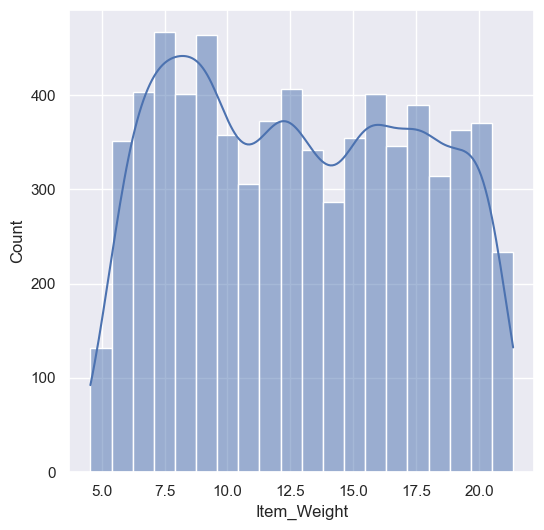

In [20]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
# Recommended replacement for distplot
sns.histplot(big_mart_sales['Item_Weight'], kde=True)
plt.show()

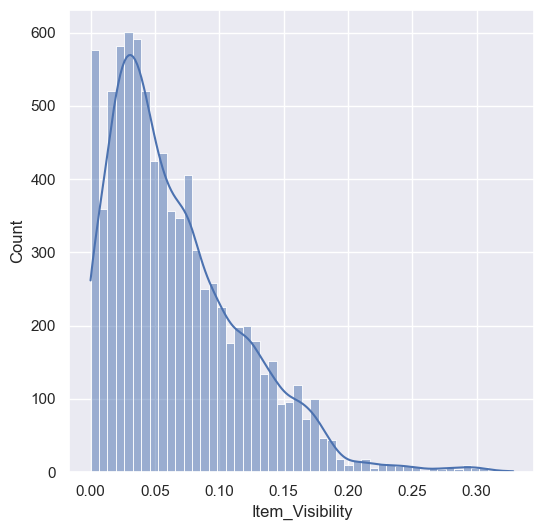

In [21]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_sales['Item_Visibility'], kde=True)
plt.show()

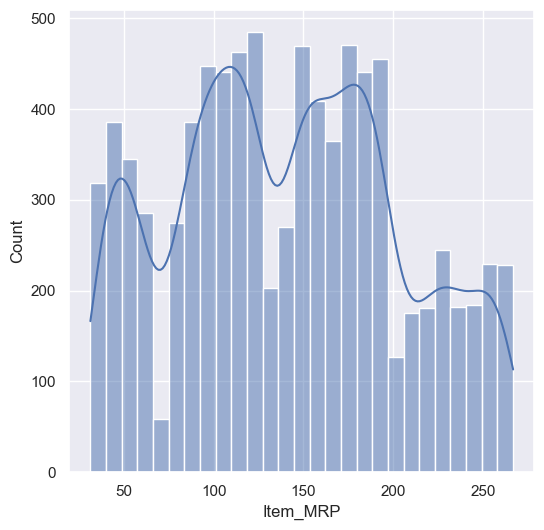

In [22]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_sales['Item_MRP'], kde=True)
plt.show()

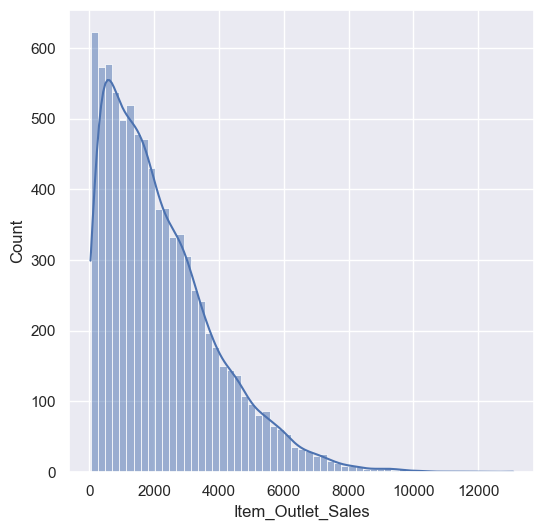

In [23]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_sales['Item_Outlet_Sales'], kde=True)
plt.show()

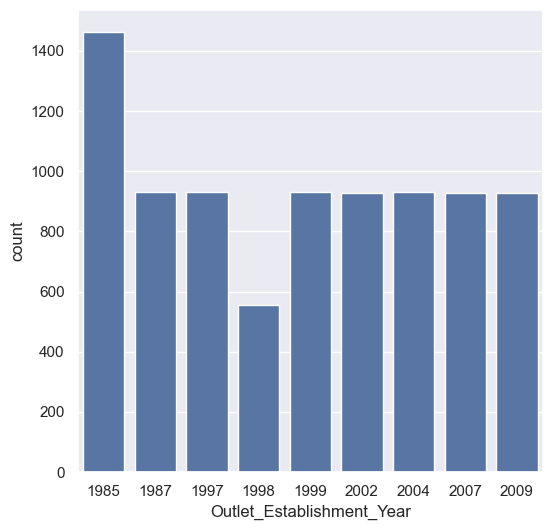

In [24]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_sales)
plt.show()

# Categorical Features

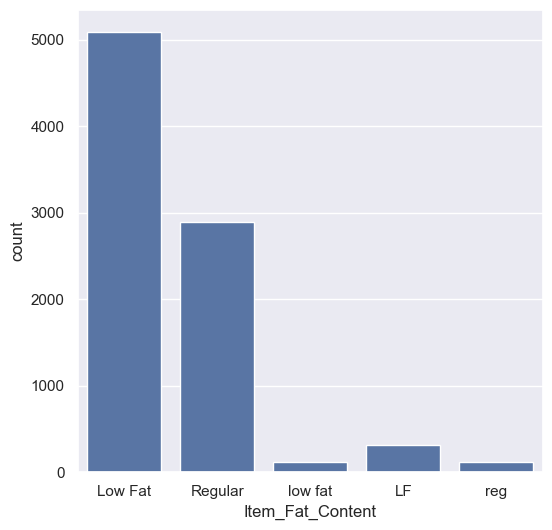

In [25]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_sales)
plt.show()

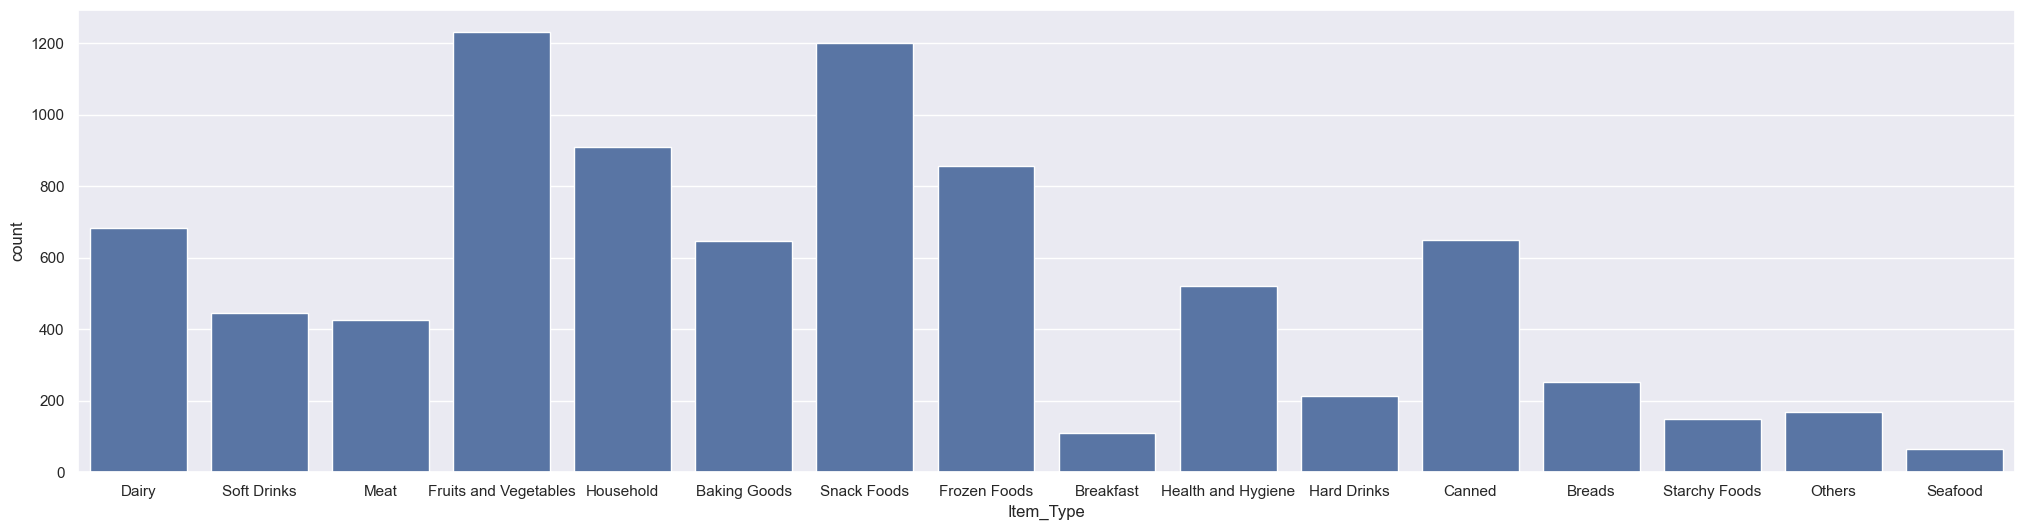

In [26]:
#Item_Type column
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=big_mart_sales)
plt.show()

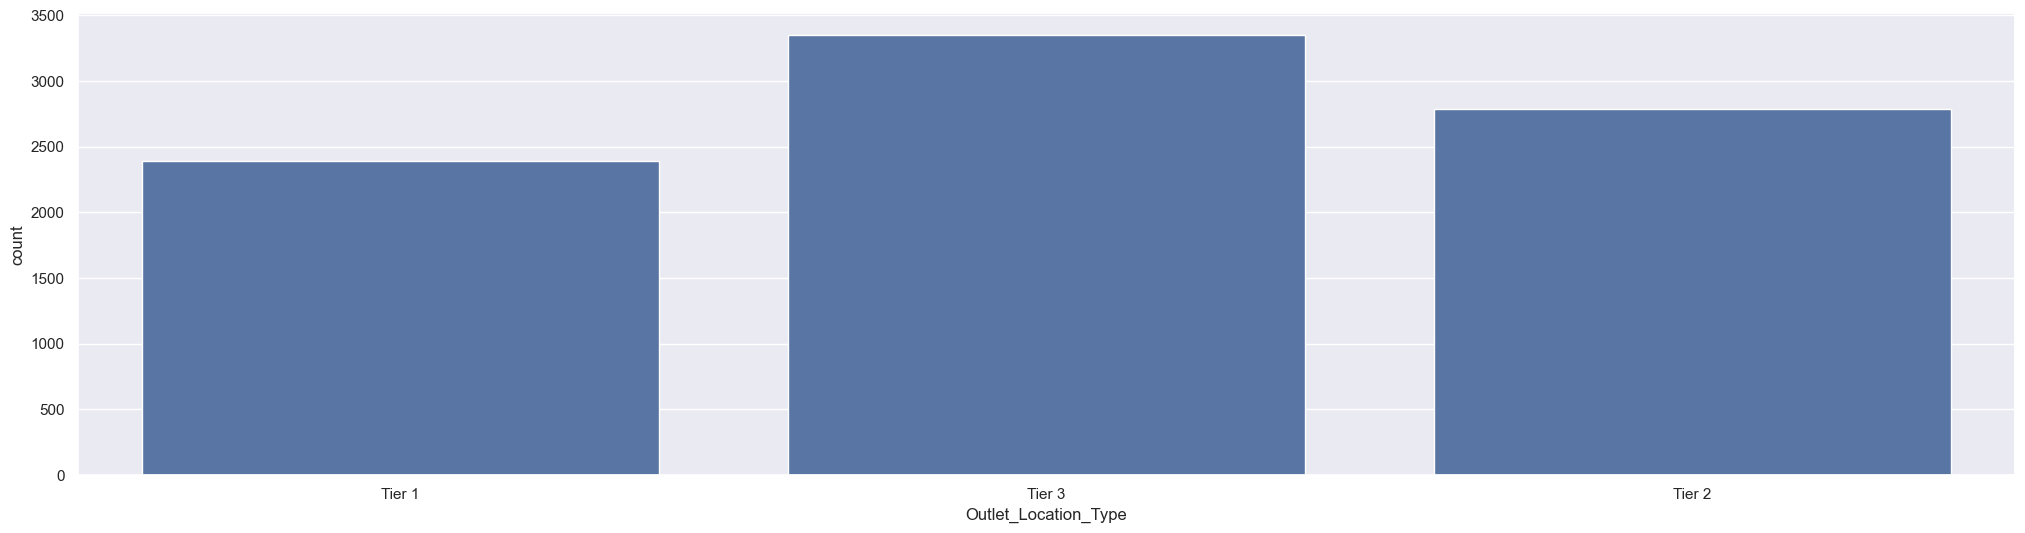

In [27]:
#Outlet_Location_Type column
plt.figure(figsize=(25,6))
sns.countplot(x='Outlet_Location_Type', data=big_mart_sales)
plt.show()

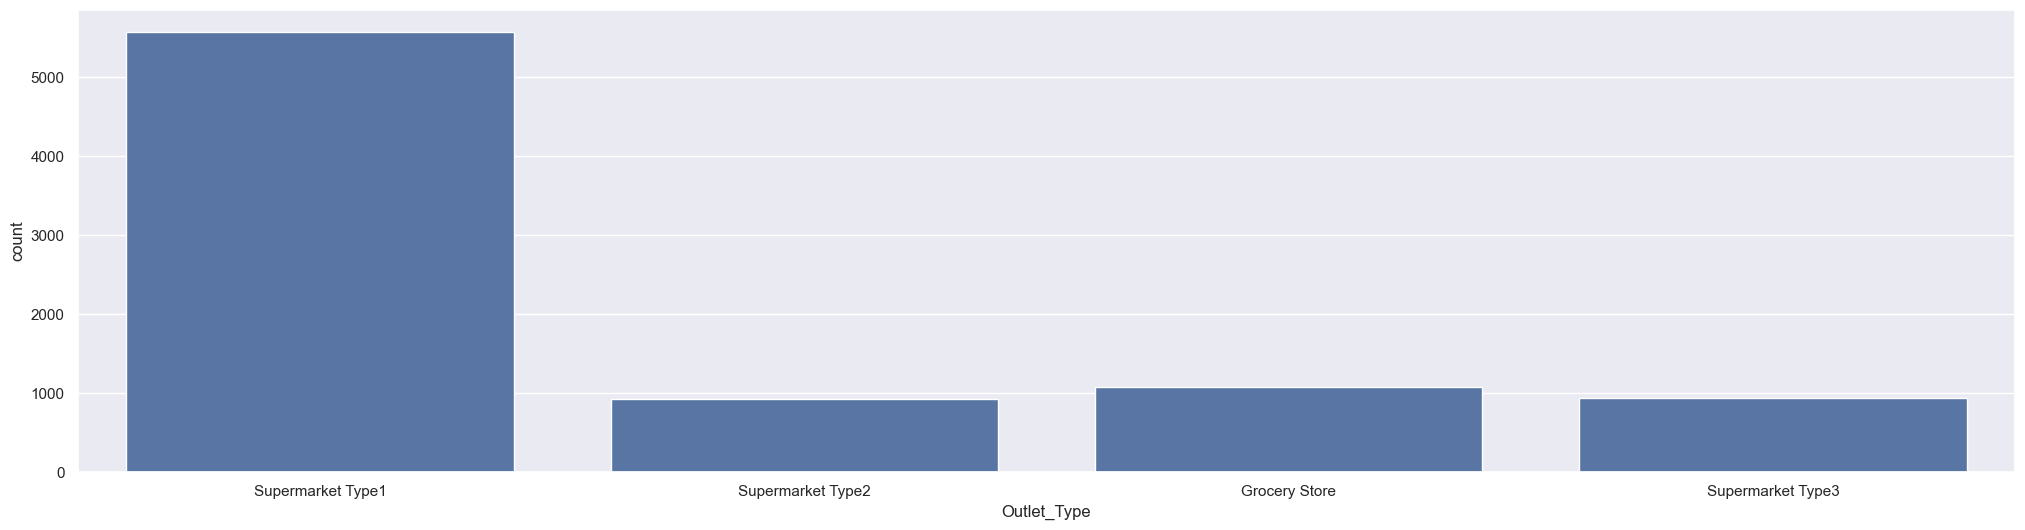

In [28]:
#Outlet_Type column
plt.figure(figsize=(25,6))
sns.countplot(x='Outlet_Type', data=big_mart_sales)
plt.show()

# Data Preprocessing

In [29]:
big_mart_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Size Outlet_Type ...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
# changing categories in 'Item_fat_Content' column
big_mart_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [31]:
big_mart_sales.replace({'Item_Fat_Content': {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}}, inplace = True)

In [32]:
big_mart_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [35]:
big_mart_sales['Outlet_Size'].apply(type).value_counts()

Outlet_Size
<class 'str'>                            6113
<class 'pandas.core.frame.DataFrame'>    2410
Name: count, dtype: int64

In [37]:
big_mart_sales['Outlet_Size'] = big_mart_sales['Outlet_Size'].astype(str)

# Label Encoding

In [38]:
encoder = LabelEncoder()

In [39]:
big_mart_sales['Item_Identifier'] = encoder.fit_transform(big_mart_sales['Item_Identifier'])
big_mart_sales['Item_Fat_Content'] = encoder.fit_transform(big_mart_sales['Item_Fat_Content'])
big_mart_sales['Item_Type'] = encoder.fit_transform(big_mart_sales['Item_Type'])
big_mart_sales['Outlet_Identifier'] = encoder.fit_transform(big_mart_sales['Outlet_Identifier'])
big_mart_sales['Outlet_Size'] = encoder.fit_transform(big_mart_sales['Outlet_Size'])
big_mart_sales['Outlet_Location_Type'] = encoder.fit_transform(big_mart_sales['Outlet_Location_Type'])
big_mart_sales['Outlet_Type'] = encoder.fit_transform(big_mart_sales['Outlet_Type'])

In [40]:
big_mart_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,2,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,2,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052


# Splitting Features and Target

In [41]:
X = big_mart_sales.drop(columns='Item_Outlet_Sales', axis=1)

Y = big_mart_sales['Item_Outlet_Sales']

In [42]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [43]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting the data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Model Training - XGBoost

In [46]:
regressor = XGBRegressor()

In [47]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation

In [48]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [63]:
# R Square Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R2_train", r2_train)

R2_train 0.8781577727472717


In [64]:
#prediction on testing data
testing_data_prediction = regressor.predict(X_test)

In [65]:
#R Square Value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print("R2_test", r2_test)

R2_test 0.5372416316318052


In [66]:
rmse_train = metrics.mean_squared_error(Y_train, training_data_prediction)
print("RMSE:", rmse_train)

RMSE: 349325.1462085151


In [67]:
rmse_test = metrics.mean_squared_error(Y_test, testing_data_prediction)
print("RMSE:", rmse_test)

RMSE: 1428569.6560454955
